HW 4 540

1. Generate random 200 MVN data, p=20. 

The covariance matrix should be positive semi- definite symmetric matrix.

(1) Calculate sample covariance matrix.

(2) Find out the first three principal components.

(3) Calcuate the proportions of the variability of data that can be explained by the first K

principal components and find the value of K that it reaches to 99% of the variability.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import *
from numpy import *
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline
np.random.seed(42)

In [32]:
# p=20
# The Multivariate  normal distribution with p =20 mean vector is mu.
# The covariance matrix is cov.
mu = np.random.uniform(-10,10,size=20)
C = np.random.random((20,20))
cov = C @ C.T # positive semi-definite

In [33]:
# pd.DataFrame(mu)

In [34]:
# pd.DataFrame(cov)

In [35]:
Ns = 200 #Generate 100 samples from x1-x20
data = np.random.multivariate_normal(mu, cov, size=Ns)
# x1 = data[:, 0]
# x2 = data[:, 1]
# x20 = data[:,19]

In [36]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.706567,5.077848,-1.602569,-10.728479,7.036942,-8.776229,3.615623,11.871526,1.143074,-3.869707,4.194060,7.235863,1.811517,10.290776,-8.334509,1.097960,4.134713,8.980113,-5.556677,6.126781
1,3.221259,-0.055067,-5.885327,-15.101094,1.064520,-15.025054,-0.470090,6.026727,-5.039350,-9.511045,-1.162743,3.788563,-1.484090,3.406862,-14.341121,-4.053505,0.645612,2.280240,-11.251444,0.231464
2,10.478225,6.507832,2.262906,-7.618560,9.136298,-6.830246,8.017897,14.253019,0.908838,-5.009793,8.178762,6.371882,3.845218,10.909081,-7.204455,2.784473,5.915492,6.997216,-6.276944,7.792534
3,4.585151,5.304120,-1.448295,-8.824137,4.703947,-11.065459,0.978868,9.601607,-3.689746,-4.191817,4.479764,7.330447,2.508746,10.935600,-9.891052,0.300201,5.287650,6.958315,-4.604255,5.480140
4,3.985787,1.218452,-4.314335,-11.086547,5.656857,-11.231717,3.052741,6.640986,-3.284807,-7.088864,1.270260,5.213676,-1.387815,6.442087,-11.724991,-1.561831,2.605041,5.308243,-7.882291,4.388064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,8.068093,4.459886,-2.551883,-9.617374,10.916549,-7.210366,4.347525,9.269527,-1.234150,-5.801342,3.674750,7.202300,-0.602935,8.808629,-7.567016,1.846545,3.179496,8.353541,-6.117716,7.621294
196,3.409007,5.059177,-4.754515,-10.007148,3.464953,-12.118113,1.984134,7.735404,-3.966158,-8.439667,1.540663,3.455469,-0.061956,9.660788,-10.628446,-2.701193,2.709896,5.351293,-10.075271,3.809631
197,4.214061,4.121668,-2.645933,-8.361730,6.577279,-11.287068,2.410698,8.228314,-3.356660,-5.155796,3.676384,4.153549,1.512026,7.600780,-7.431632,-1.793559,2.666500,7.331977,-9.320075,5.433086
198,7.967420,5.722842,-0.819264,-8.822807,8.562482,-8.477407,5.394068,10.666350,0.550715,-3.027122,6.131667,10.214650,1.887949,11.094827,-8.599876,1.541214,6.389510,10.691947,-1.799470,8.866820


In [37]:
#normalize data
scaler = preprocessing.StandardScaler().fit(data)
data_scaled = scaler.transform(data)
scov = np.cov(data_scaled)
pd.DataFrame(scov)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.123158,0.043111,-0.011949,0.005318,-0.026385,-0.014507,-0.002931,0.040019,-0.027712,0.051015,...,0.087214,-0.059785,0.013803,-0.005825,0.095052,-0.001892,-0.045816,-0.057864,0.053078,-0.073443
1,0.043111,0.203768,0.093784,-0.005176,0.028270,-0.050971,-0.114198,0.045710,-0.060923,0.051548,...,0.093506,0.015890,0.007431,0.024438,0.093835,-0.025212,-0.075229,-0.031389,0.015306,-0.133261
2,-0.011949,0.093784,0.361916,-0.088270,-0.018316,-0.132114,-0.079481,-0.106098,-0.061276,-0.004867,...,-0.090651,0.070015,0.094670,-0.054904,0.088916,-0.011312,0.042045,0.011628,-0.155678,-0.247378
3,0.005318,-0.005176,-0.088270,0.316540,-0.064905,0.049620,0.013222,-0.070390,-0.005543,-0.012181,...,-0.061542,-0.055864,-0.043837,0.012220,0.011510,-0.154021,0.050088,0.002776,0.087892,-0.001780
4,-0.026385,0.028270,-0.018316,-0.064905,0.084217,0.012952,-0.028490,0.102459,0.003197,-0.033754,...,0.063165,0.051889,-0.026711,-0.019736,-0.014585,0.082141,-0.090381,-0.028682,0.046831,0.046650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.001892,-0.025212,-0.011312,-0.154021,0.082141,0.017286,0.048747,0.158980,0.037749,-0.078252,...,0.098095,0.179386,-0.000659,-0.058094,0.006532,0.277923,-0.092255,-0.028129,0.039119,0.103955
196,-0.045816,-0.075229,0.042045,0.050088,-0.090381,0.012899,0.029020,-0.200226,0.056930,0.036409,...,-0.131042,0.019213,0.025361,0.037093,-0.087428,-0.092255,0.202260,0.063678,-0.108389,0.007229
197,-0.057864,-0.031389,0.011628,0.002776,-0.028682,-0.013976,0.014220,-0.075494,0.020382,0.012319,...,-0.204239,0.014444,-0.075646,-0.005481,-0.046373,-0.028129,0.063678,0.214779,-0.120198,-0.005413
198,0.053078,0.015306,-0.155678,0.087892,0.046831,0.021835,-0.006750,0.183972,-0.012628,-0.035306,...,0.174453,-0.002590,-0.031207,-0.031413,0.037971,0.039119,-0.108389,-0.120198,0.239161,0.090506


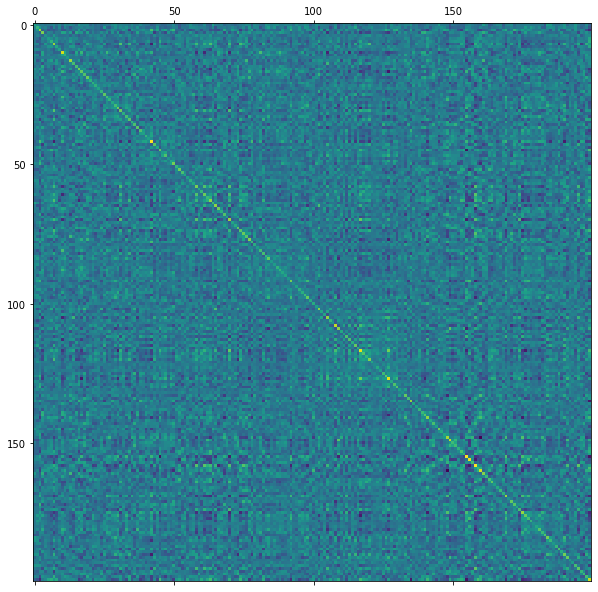

In [39]:
plt.rcParams['figure.figsize']=(10,10)
plt.matshow(scov)
plt.show()

In [66]:
pca=PCA(n_components='mle')
pca.fit(scov)
pca_cov = pca.transform(scov)
# pd.DataFrame(pca_cov)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.073642,-0.304026,-0.215014,0.519546,0.130283,-0.148431,0.021896,-0.053241,-0.049693,0.039981,-0.100871,-0.093660,0.050523,0.049839,-0.017782,0.003878,-0.014099,0.000251,-2.533449e-05
1,0.125709,-0.479705,-0.369053,0.260089,-0.267252,-0.104835,0.241043,0.313571,-0.100798,-0.175003,-0.022392,0.090814,-0.063212,-0.010302,0.017287,0.000473,0.003625,-0.002420,1.378771e-05
2,0.658266,0.652395,-0.643153,0.150586,-0.526651,0.191638,-0.107031,0.323061,0.114385,-0.096321,-0.118184,-0.037074,-0.103149,0.006215,0.002502,0.018250,-0.004878,-0.001384,-9.786734e-06
3,0.346647,-0.432384,0.920109,0.292972,0.305207,0.260170,-0.123441,0.302732,-0.016843,0.013721,0.079890,-0.005120,-0.039446,0.036236,-0.002968,-0.009279,-0.005324,-0.000944,2.203260e-05
4,-0.468806,-0.196282,-0.087264,-0.163826,-0.304664,0.007025,0.010768,-0.070972,0.000010,-0.160833,0.052245,-0.013408,0.025141,-0.019642,-0.003448,0.004099,-0.000191,-0.001180,1.489543e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.088577,0.464810,-0.223166,0.194857,-0.355005,0.013431,-0.027072,-0.170822,-0.113130,-0.029063,-0.007392,0.055002,0.157552,-0.057618,-0.020608,-0.020373,-0.014081,0.002987,-1.841076e-06
196,0.458056,0.587288,0.099253,-0.170244,0.385626,0.290658,0.172518,0.080636,0.035070,0.186668,0.005783,-0.020170,-0.067280,0.036174,0.046524,-0.025288,0.000414,0.003538,-3.544561e-07
197,0.374617,0.643169,0.469053,-0.123164,-0.085707,-0.332872,0.302698,0.027534,0.159470,-0.034124,0.072024,0.067859,0.026697,-0.003758,-0.014704,-0.000642,0.006166,0.001410,-2.929596e-05
198,-0.660826,-0.823029,0.293928,0.148843,-0.078167,-0.013514,-0.115083,0.039366,-0.174025,0.108047,0.019711,-0.189880,0.057193,-0.036694,0.019097,-0.002536,-0.009456,-0.000914,1.492550e-06


51,  0.13964902,  0.21532677,  0.66226023,  0.25935382,
       -0.70477121, -0.86921947,  0.2174722 , -0.08585139,  0.55402314,
       -1.08857711,  0.45805556,  0.37461721, -0.66082636, -1.33412697])

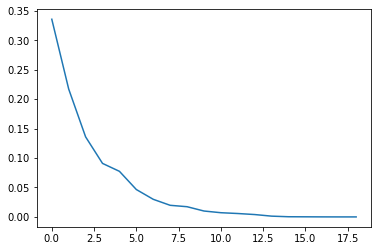

In [59]:
plt.plot(pca.explained_variance_ratio_)

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

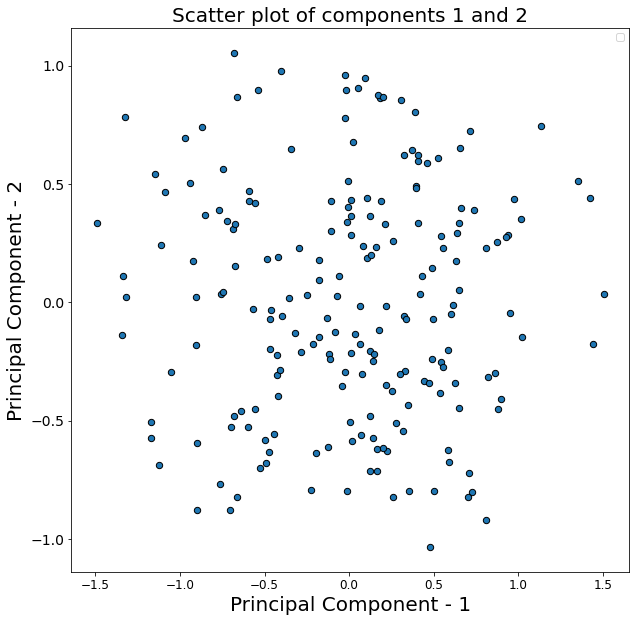

In [75]:
# ??

plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Scatter plot of components 1 and 2",fontsize=20)
plt.scatter(pca_cov[:, 0],pca_cov[:, 1], cmap=plt.cm.Set1, edgecolor='k', s=40)

# 用上次那个三一图

plt.legend()

2. Generate $Y$ values using the following regression functions: 

$Y=5+2 X_{1}+5 X_{3}+$ $3 X_{19}+\epsilon$ 
for the generated X matrix in #1

 (1) Estimate the regression line using the least square method and find out the predicted values, residuals for each observation and the mean square errors.

(2) Estimate the regression line using the least square method based on the first 5 principal components and find out the predicted values, residuals for each observation and the mean square errors.

(3) Compare the results in (1) and (2).